In [1]:
from fonctions import *
import fonctions
import math
import importlib
import mesa
from math import inf
from mesa import Agent
from mesa import Model
from mesa.time import RandomActivation
from mesa.time import BaseScheduler

importlib.reload(fonctions)

<module 'fonctions' from 'c:\\Users\\moham\\desktop\\G2\\ICO\\Algo_Optimisation_PTV\\fonctions.py'>

In [2]:
data_depot = pd.read_csv('data_depot.csv')
data_client_index = pd.read_csv('data_clients.csv')



with open('distance_matrix.pickle', 'rb') as handle:
    distance_matrix = pickle.load(handle)

with open('times.pickle', 'rb') as handle:
    times = pickle.load(handle)


n = 50

data_depot = data_depot.iloc[:n]
data_client_index = data_client_index.iloc[:n]
distance_matrix = distance_matrix[:n , :n]
times = times[:n,:]

In [5]:
def Voisinnage(T):
    n = len(T)
    i = np.random.randint(n)
    j = np.random.randint(n)
    T[j] = i
    T[i] = j
    return(T)

In [2]:
def recuit_simule(initial_state,  temperature_initiale=1.0, temperature_finale=1e-8, alpha=0.99):

    """Implémente l'algorithme de recuit simulé."""

    history = []
    current_state = initial_state
    current_energy = cout_fonction(code_to_X2(current_state))
    best_state = current_state
    best_energy = current_energy
    temperature = temperature_initiale

    while temperature > temperature_finale:
        
        #V = Voisinnage(current_state)
        new_state =  Voisinnage(current_state)
        new_energy = cout_fonction(code_to_X2(new_state))
        delta_energy = new_energy - current_energy

        if delta_energy < 0 or math.exp(-delta_energy / temperature) > random.random():
            current_state = new_state
            current_energy = new_energy

        if current_energy < best_energy:
            best_state = current_state
            best_energy = current_energy

        temperature *= alpha

        history.append(best_energy)

        print('best_energy : '  , best_energy)
        print('temperature : '  , temperature)
        print('new state : '  , current_state)


    return best_state, best_energy , history


In [8]:
code_I= [i for i in range(n)]
#S1,T = RS1(code_I,5,0.97,7)

In [9]:
best_state, best_energy , history = recuit_simule(code_I,  temperature_initiale=1.0, temperature_finale=1e-8, alpha=0.99)

best_energy :  833.379401344621
temperature :  0.99
new state :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 40, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 21, 41, 42, 43, 44, 45, 46, 47, 48, 49]
best_energy :  833.379401344621
temperature :  0.9801
new state :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 40, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 21, 41, 42, 43, 44, 45, 46, 47, 48, 49]
best_energy :  830.1707160614116
temperature :  0.9702989999999999
new state :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 22, 16, 17, 18, 19, 20, 40, 15, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 21, 41, 42, 43, 44, 45, 46, 47, 48, 49]
best_energy :  830.1707160614116
temperature :  0.96059601
new state :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 23, 11, 12, 13, 14, 22, 16, 17, 18, 19, 20, 40, 15, 10, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 

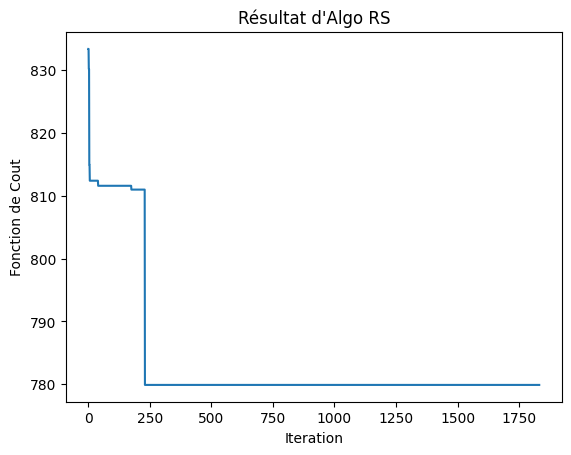

In [11]:
plt.plot(history)
plt.xlabel('Iteration')
plt.ylabel('Fonction de Cout')
plt.title("Résultat d'Algo RS")
plt.savefig('Algo_RS')

Text(0.5, 1.0, 'Cout de fonction RS')

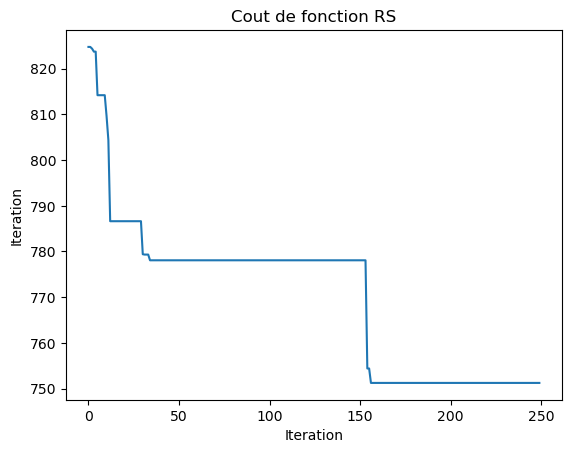

In [34]:
plt.plot(history[:250])
plt.xlabel('Iteration')
plt.ylabel('Iteration')
plt.title('Cout de fonction RS')